#### 1. 라이브러리 호출

In [14]:
import torch
import torch.nn as nn
import torch.autograd 
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms # 데이터 전처리를 위해 사용하는 라이브러리
from torch.utils.data import DataLoader, Dataset

import matplotlib.pyplot as plt
import numpy as np

#### 2. CPU인지 GPU인지 확인 후 device 설정

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #  torch.cuda.is_available() GPU를 사용가능하면 True, 아니라면 False를 리턴
print("지금 사용하는 device :",device)

지금 사용하는 device : cuda:0


#### 3. 데이터셋 다운받기

- 데이터셋 다운 받는 법

    - train_dataset = torchvision.datasets.FashionMNIST("FashionMNIST를 내려받은 경로", download = True, transform = transform.Compose( [ transform.ToTensor() ] ) )
        - 첫번째 파라미터 : 다운 받을 경로
        - 두번째 파라미터 : 첫 번째 파라미터 즉, 다운 받을 경로에 해당 데이터셋이 있는지 확인한 후 내려받는다
        - 세번째 파라미터 : 이미지를 텐서로 변경하란 
        
> 정보 : https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html

In [5]:
train_dataset = torchvision.datasets.FashionMNIST("./FashionMnist",download = True, transform = transforms.Compose([transforms.ToTensor()]))
test_dataset = torchvision.datasets.FashionMNIST("./FashionMnist",download = True, train = False, transform = transforms.Compose([transforms.ToTensor()]))

100.0%


Extracting ./FashionMnist\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./FashionMnist\FashionMNIST\raw



100.6%


Extracting ./FashionMnist\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./FashionMnist\FashionMNIST\raw



100.0%


Extracting ./FashionMnist\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./FashionMnist\FashionMNIST\raw



119.3%
c:\Users\luili\anaconda3\envs\Pytorch_studing\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Extracting ./FashionMnist\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./FashionMnist\FashionMNIST\raw



In [28]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=100)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=100)


tensor(0.)


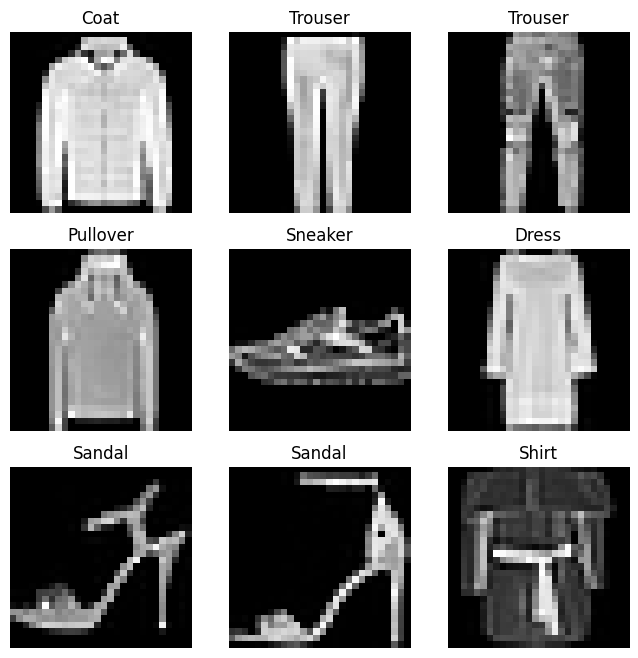

In [33]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

fig = plt.figure(figsize=(8,8))
cols, rows = 3, 3 # 세로(열) 3, 가로(행) 3

for i in range(1, cols * rows + 1):
    img_xy = np.random.randint(len(train_dataset)) # 데이터셋 번호중 랜덤으로 뽑기
    img = train_dataset[img_xy][0][0,:,:] # 데이터셋은 [이미지 번호][0: 이미지, 1: 레이블][이미지 데이터 : 1x28x28 각각 채널, 가로, 세로이다]
    fig.add_subplot(rows, cols, i)
    plt.title(labels_map[train_dataset[img_xy][1]]) # 레이블을 타이틀로 설정
    plt.axis('off')
    plt.imshow(img,cmap='gray')

plt.show()

In [ ]:
class FashionCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)




        )